In [93]:
import pandas as pd
from pandas import ExcelWriter, ExcelFile
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.cm as cm
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris

from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import AgglomerativeClustering

import scipy.cluster.hierarchy as shc

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples, davies_bouldin_score
from random import sample
from numpy.random import uniform
from math import isnan

from yellowbrick.cluster import KElbowVisualizer

In [94]:
# TODO: sheet_name change
original_df= pd.read_excel('newdata.xlsx', sheet_name='TAXONOMY DATA')
original_df

/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


,Unnamed: 0,Unnamed: 1,Community,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Governance,Unnamed: 9,...,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Treasury,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,NaN,NaN,Membership,NaN,NaN,NaN,NaN,Meta Information,Token,NaN,...,NaN,NaN,Voting,NaN,NaN,Meta Information,NaN,NaN,Setup,NaN
1,Responsible,DAOs,Access,Type,Is hierachical,Anonymity,Contributor Rewards,Purpose,Token Type,Supply Cap,...,Execution,has Proposal Creation Restricted,is fully On-Chain,Power,Limits,Diversification,Stakes Tokens,Capital Gain,Initial Airdrop,Initial Token Sale
2,CHRISTIAN,Uniswap,Open,Profit from Tokens,No,Anonymous,Governance Token,Product Building and Management,Singular,Capped,...,Automatic,#Tokens Owned,Yes,#Tokens Owned,None,None,Yes,Services,Yes,No
3,CHRISTIAN,Compound,Open,Profit from Tokens,No,Anonymous,Governance Token,Product Building and Management,Singular,Capped,...,Automatic,#Tokens Owned,Yes,#Tokens Owned,None,None,Yes,Services,No,Yes
4,CHRISTIAN,Aave,Open,Profit from Tokens,No,Anonymous,Governance Token,Product Building and Management,Singular,Capped,...,Automatic,#Tokens Owned,Yes,#Tokens Owned,None,None,Yes,Services,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,MIGO,Nervos Network,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76,MIGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77,MIGO,Stratis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78,MIGO,Ox,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:
datasize = 72
df = original_df.iloc[1:]
df.columns = df.iloc[0]
df = df.drop(df.index[0])
df = df.iloc[:datasize]
df = df.iloc[:, 2:22]
df

1,Access,Type,Is hierachical,Anonymity,Contributor Rewards,Purpose,Token Type,Supply Cap,Entry Barriers,is fully Public,Execution,has Proposal Creation Restricted,is fully On-Chain,Power,Limits,Diversification,Stakes Tokens,Capital Gain,Initial Airdrop,Initial Token Sale
2,Open,Profit from Tokens,No,Anonymous,Governance Token,Product Building and Management,Singular,Capped,Ownership,Yes,Automatic,#Tokens Owned,Yes,#Tokens Owned,None,None,Yes,Services,Yes,No
3,Open,Profit from Tokens,No,Anonymous,Governance Token,Product Building and Management,Singular,Capped,Ownership,Yes,Automatic,#Tokens Owned,Yes,#Tokens Owned,None,None,Yes,Services,No,Yes
4,Open,Profit from Tokens,No,Anonymous,Governance Token,Product Building and Management,Singular,Capped,Ownership,Yes,Automatic,#Tokens Owned,Yes,#Tokens Owned,None,None,Yes,Services,No,Yes
5,Open,Profit from Tokens,No,Anonymous,Governance Token,Product Building and Management,Singular,Capped,Ownership,Yes,Manual,Allowlist,No,#Tokens Owned,None,Very,Yes,Services,Yes,No
6,Open,Profit from Tokens,No,Anonymous,Governance Token,Product Building and Management,Singular,Capped,Ownership,Yes,Manual,#Tokens Owned,No,#Tokens Owned,None,None,Yes,Services,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,Token Ownership,Community,No,Pseudonymous,Other Token,Community Building and Engagement,Singular,Capped,Ownership,Yes,Manual,Allowlist,No,Per Individual,Per Address,Very,Yes,Services,No,Yes
70,Invitation,Decider,No,Pseudonymous,Governance Token,Product Building and Management,Singular,Capped,Ownership,Yes,Manual,Allowlist,No,#Tokens Owned,None,Very,No,Services,Yes,No
71,Token Ownership,Community,No,Anonymous,Other Token,Community Building and Engagement,Singular,Uncapped,Ownership,Yes,Automatic,#Tokens Owned,Yes,#Tokens Owned,None,Very,No,Token Sales,No,Yes
72,Open,Profit from Tokens,No,Anonymous,Other Token,Product Building and Management,Primary and Reputation,Capped,Ownership,No,Automatic,Allowlist,No,#Tokens Owned,None,Very,No,Services,No,Yes


In [96]:
cluster_size = 5

In [97]:
encoder = OneHotEncoder(handle_unknown='ignore')
encoder_df = pd.DataFrame(encoder.fit_transform(df).toarray())

In [98]:
pca = PCA(n_components=cluster_size)
pca.fit(encoder_df)
pca_samples = pca.transform(encoder_df)

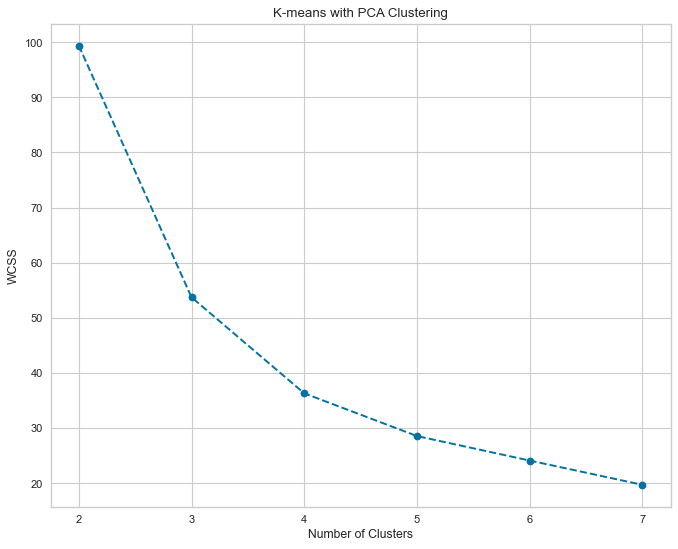

In [99]:
pca2 = PCA(n_components=2)
pca2.fit(encoder_df)
pca_samples2 = pca2.transform(encoder_df)

wcss = []
for i in range(2, 8):
    kmeans_pca = KMeans(n_clusters=i, init="k-means++", random_state=42)
    kmeans_pca.fit(pca_samples2)
    wcss.append(kmeans_pca.inertia_)

plt.figure(figsize=(10,8))
plt.plot(range(2,8), wcss, marker = 'o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means with PCA Clustering')
plt.show()
    

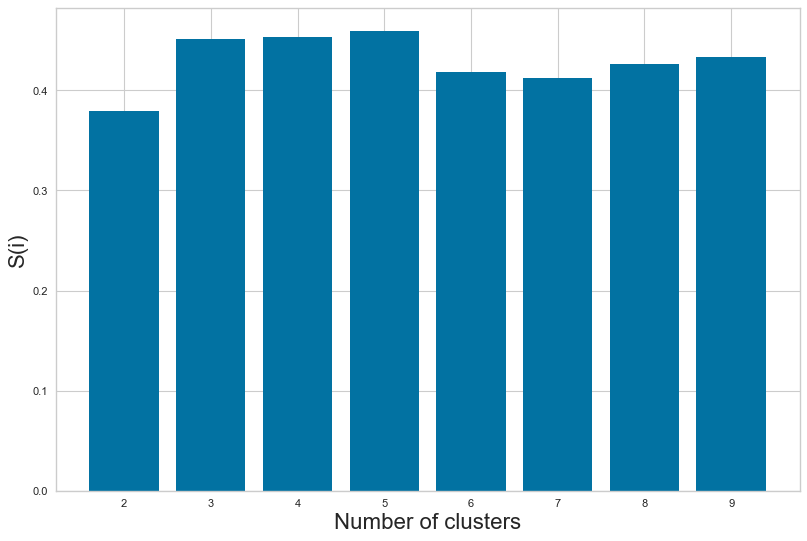

In [100]:
silhouette_scores = []
for i in range(2,10):
    m1=KMeans(n_clusters=i, random_state=42)
    c = m1.fit_predict(pca_samples2)
    silhouette_scores.append(silhouette_score(pca_samples2, m1.fit_predict(pca_samples2))) 
plt.bar(range(2,10), silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show()

In [101]:
sc=max(silhouette_scores)
number_of_clusters=silhouette_scores.index(sc)+2
print("Number of Cluster is : ", number_of_clusters)

Number of Cluster is :  5


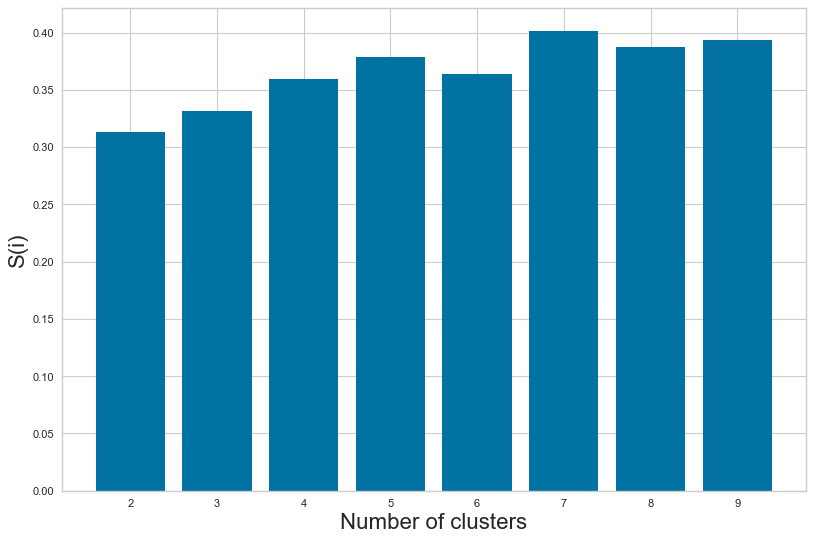

In [102]:
silhouette_scores = []
for i in range(2,10):
    m1= AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='ward')
    c = m1.fit_predict(pca_samples2)
    silhouette_scores.append(silhouette_score(pca_samples2, c)) 
plt.bar(range(2,10), silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show()

In [103]:
sc=max(silhouette_scores)
number_of_clusters=silhouette_scores.index(sc)+2
print("Number of Cluster is : ", number_of_clusters)

Number of Cluster is :  7


In [104]:
for n_clusters in range(2,11):
    clusterer = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
    cluster_labels = clusterer.fit_predict(pca_samples2)

    silhouette_avg = silhouette_score(pca_samples2, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.31337549791776087
For n_clusters = 3 The average silhouette_score is : 0.33110977302869277
For n_clusters = 4 The average silhouette_score is : 0.3590490166402809
For n_clusters = 5 The average silhouette_score is : 0.3785319656529576
For n_clusters = 6 The average silhouette_score is : 0.36412664214495216
For n_clusters = 7 The average silhouette_score is : 0.40167227797299176
For n_clusters = 8 The average silhouette_score is : 0.38701040210804705
For n_clusters = 9 The average silhouette_score is : 0.39367767924258523
For n_clusters = 10 The average silhouette_score is : 0.4026241678572123


In [105]:
X = df.copy()
from sklearn.preprocessing import LabelEncoder

X.iloc[:]=X.iloc[:].apply(LabelEncoder().fit_transform)
X

1,Access,Type,Is hierachical,Anonymity,Contributor Rewards,Purpose,Token Type,Supply Cap,Entry Barriers,is fully Public,Execution,has Proposal Creation Restricted,is fully On-Chain,Power,Limits,Diversification,Stakes Tokens,Capital Gain,Initial Airdrop,Initial Token Sale
2,1,2,0,0,0,2,1,0,2,1,0,0,1,0,0,0,1,1,1,0
3,1,2,0,0,0,2,1,0,2,1,0,0,1,0,0,0,1,1,0,1
4,1,2,0,0,0,2,1,0,2,1,0,0,1,0,0,0,1,1,0,1
5,1,2,0,0,0,2,1,0,2,1,1,1,0,0,0,2,1,1,1,0
6,1,2,0,0,0,2,1,0,2,1,1,0,0,0,0,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,2,0,0,2,1,0,1,0,2,1,1,1,0,2,1,2,1,1,0,1
70,0,1,0,2,0,2,1,0,2,1,1,1,0,0,0,2,0,1,1,0
71,2,0,0,0,1,0,1,1,2,1,0,0,1,0,0,2,0,2,0,1
72,1,2,0,0,1,2,0,0,2,0,0,1,0,0,0,2,0,1,0,1


In [106]:
sc = StandardScaler()
scaled_data = X.copy()
scaled_data = sc.fit_transform(scaled_data)
scaled_data = pd.DataFrame(scaled_data)
scaled_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.311501,0.762024,-0.353553,-1.816919,-0.779705,0.657473,0.328165,-0.424650,-0.268112,0.301511,-1.612452,-0.872872,1.732051,-0.417878,-0.301511,-0.928985,1.057188,0.118678,1.118034,-1.217686
1,-0.311501,0.762024,-0.353553,-1.816919,-0.779705,0.657473,0.328165,-0.424650,-0.268112,0.301511,-1.612452,-0.872872,1.732051,-0.417878,-0.301511,-0.928985,1.057188,0.118678,-0.894427,0.821230
2,-0.311501,0.762024,-0.353553,-1.816919,-0.779705,0.657473,0.328165,-0.424650,-0.268112,0.301511,-1.612452,-0.872872,1.732051,-0.417878,-0.301511,-0.928985,1.057188,0.118678,-0.894427,0.821230
3,-0.311501,0.762024,-0.353553,-1.816919,-0.779705,0.657473,0.328165,-0.424650,-0.268112,0.301511,0.620174,0.436436,-0.577350,-0.417878,-0.301511,1.194410,1.057188,0.118678,1.118034,-1.217686
4,-0.311501,0.762024,-0.353553,-1.816919,-0.779705,0.657473,0.328165,-0.424650,-0.268112,0.301511,0.620174,-0.872872,-0.577350,-0.417878,-0.301511,-0.928985,1.057188,0.118678,1.118034,-1.217686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,1.727415,-1.623442,-0.353553,0.583414,0.824260,-1.901340,0.328165,-0.424650,-0.268112,0.301511,0.620174,0.436436,-0.577350,3.121797,3.316625,1.194410,1.057188,0.118678,-0.894427,0.821230
68,-2.350417,-0.430709,-0.353553,0.583414,-0.779705,0.657473,0.328165,-0.424650,-0.268112,0.301511,0.620174,0.436436,-0.577350,-0.417878,-0.301511,1.194410,-0.945905,0.118678,1.118034,-1.217686
69,1.727415,-1.623442,-0.353553,-1.816919,0.824260,-1.901340,0.328165,2.354879,-0.268112,0.301511,-1.612452,-0.872872,1.732051,-0.417878,-0.301511,1.194410,-0.945905,1.827644,-0.894427,0.821230
70,-0.311501,0.762024,-0.353553,-1.816919,0.824260,0.657473,-3.047247,-0.424650,-0.268112,-3.316625,-1.612452,0.436436,-0.577350,-0.417878,-0.301511,1.194410,-0.945905,0.118678,-0.894427,0.821230


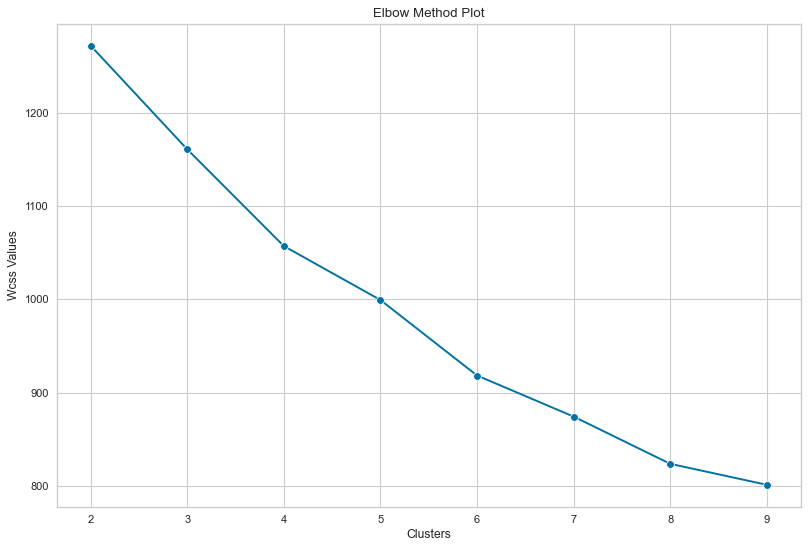

In [107]:
import seaborn as sns

wcss = []

for i in range(2, 10):
    kmeans = KMeans(
        n_clusters = i,
        init = 'k-means++',
        random_state=42
    )
    kmeans.fit(scaled_data)
    wcss.append([i, kmeans.inertia_]) # kmeans.inertial_ returns the calculated WCSS Values
    
wcss_dataframe = pd.DataFrame(wcss, columns=["clusters", "wcss value"])

# Plot for Elbow Method
plt.rcParams["figure.figsize"] = (12, 8)
plt.rcParams["figure.dpi"] = 80
sns.lineplot(
    x = wcss_dataframe.clusters.values,
    y = wcss_dataframe["wcss value"], marker="o")
plt.xticks(np.arange(2, 10))
plt.xlabel("Clusters")
plt.ylabel("Wcss Values")
plt.title("Elbow Method Plot")
plt.show()

In [108]:
ps = pd.DataFrame(pca_samples)

[0 4 4 0 0 4 2 1 2 2 2 2 2 1 3 3 3 4 1 1 2 2 2 1 1 4 4 4 1 1 0 1 1 1 0 1 0
 1 0 1 0 0 0 0 1 1 1 1 1 0 1 0 1 1 0 1 0 1 1 0 0 0 0 2 0 0 0 1 0 2 4 4]


Text(0, 0.5, 'Height')

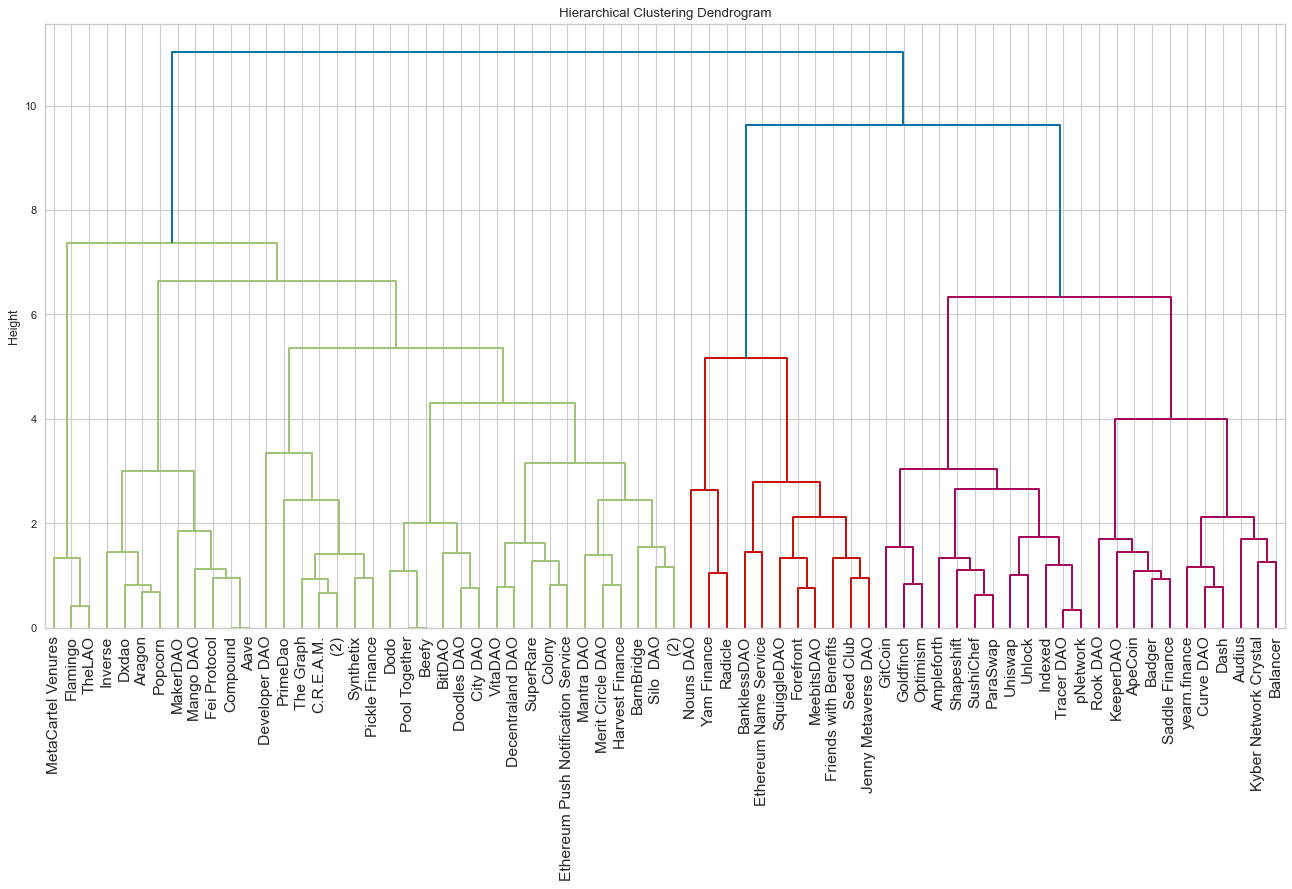

In [109]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)
    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


X = ps.copy()

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(n_clusters=5, linkage='ward', compute_distances=True, compute_full_tree=True)

fit_model = model.fit(X)
print(fit_model.labels_)
plt.figure(figsize=(20, 10))
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(fit_model, show_contracted=True, labels=original_df['Unnamed: 1'].iloc[2:datasize+2].values.tolist(), leaf_font_size=14, truncate_mode='level', p=8)
plt.ylabel("Height")

In [110]:
tocluster = pd.DataFrame(ps[[4,0]])

clusterer = KMeans(n_clusters=cluster_size,random_state=42).fit(tocluster)
centers = clusterer.cluster_centers_

In [111]:
kmeans = KMeans(n_clusters=cluster_size, random_state=42)
cluster_kmeans = kmeans.fit_predict(ps)
cluster_kmeans

array([4, 0, 0, 4, 4, 0, 1, 1, 1, 1, 1, 1, 1, 2, 3, 3, 3, 0, 2, 0, 1, 1,
       1, 2, 2, 0, 0, 0, 2, 2, 4, 2, 0, 2, 4, 2, 4, 2, 4, 2, 4, 4, 4, 4,
       2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 4, 2, 4, 2, 2, 4, 4, 4, 4, 1, 0, 0,
       4, 2, 4, 1, 0, 0], dtype=int32)

In [112]:
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=1.3,min_samples=3,metric='euclidean')
dbscan=db.fit(ps)
dbscan.labels_

array([ 0,  1,  1,  0,  0,  2, -1,  0,  0,  0,  0,  0, -1,  0,  3,  3,  3,
        2,  0, -1,  0,  0,  0,  0,  0, -1,  1,  1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0, -1,
        0, -1,  2,  2])

In [113]:
agglomerative_clustering = AgglomerativeClustering(n_clusters=cluster_size, linkage='ward').fit(ps)
agglomerative_clustering.labels_

array([0, 4, 4, 0, 0, 4, 2, 1, 2, 2, 2, 2, 2, 1, 3, 3, 3, 4, 1, 1, 2, 2,
       2, 1, 1, 4, 4, 4, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 2, 0, 0,
       0, 1, 0, 2, 4, 4])

In [114]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=cluster_size)
gmm.fit(ps)

# predict the cluster for each data point
cluster_gmm = gmm.predict(ps)
cluster_gmm

array([4, 0, 0, 1, 1, 0, 4, 3, 3, 3, 3, 3, 4, 2, 3, 3, 3, 0, 0, 0, 3, 3,
       3, 0, 2, 0, 0, 0, 2, 0, 4, 2, 0, 2, 4, 0, 1, 2, 4, 2, 4, 1, 4, 4,
       2, 0, 0, 2, 2, 1, 0, 4, 2, 2, 4, 2, 1, 0, 2, 1, 1, 1, 1, 1, 0, 0,
       1, 3, 1, 3, 0, 0])

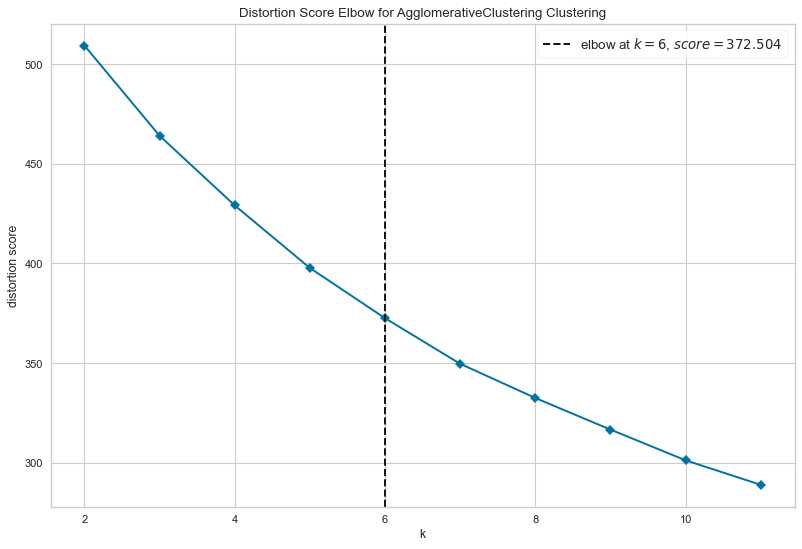

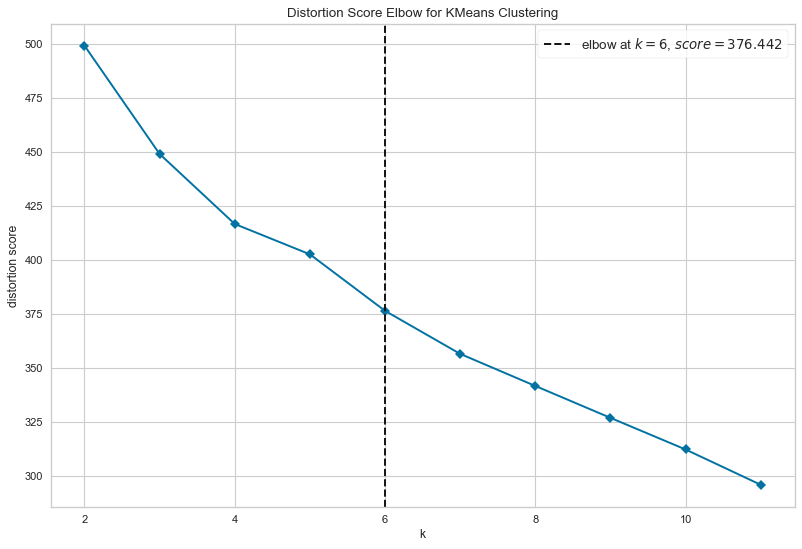

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [115]:
visualizer_dis = KElbowVisualizer(AgglomerativeClustering(linkage='ward'), k=(2,12), metric="distortion", timings=False)
visualizer_dis.fit(encoder_df.copy())        # Fit the data to the visualizer
visualizer_dis.show()        # Finalize and render the figure

visualizer_dis_kmeans = KElbowVisualizer(KMeans(), k=(2,12), metric="distortion", timings=False)
visualizer_dis_kmeans.fit(encoder_df.copy())        # Fit the data to the visualizer
visualizer_dis_kmeans.show()        # Finalize and render the figure


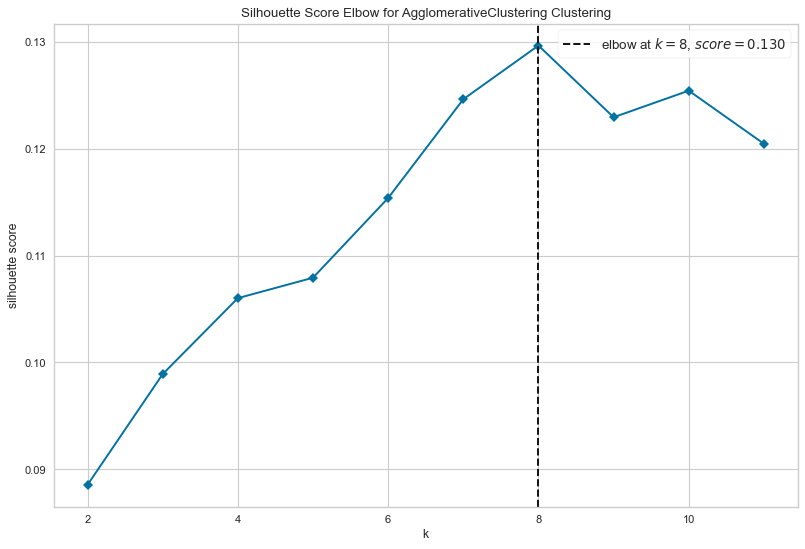

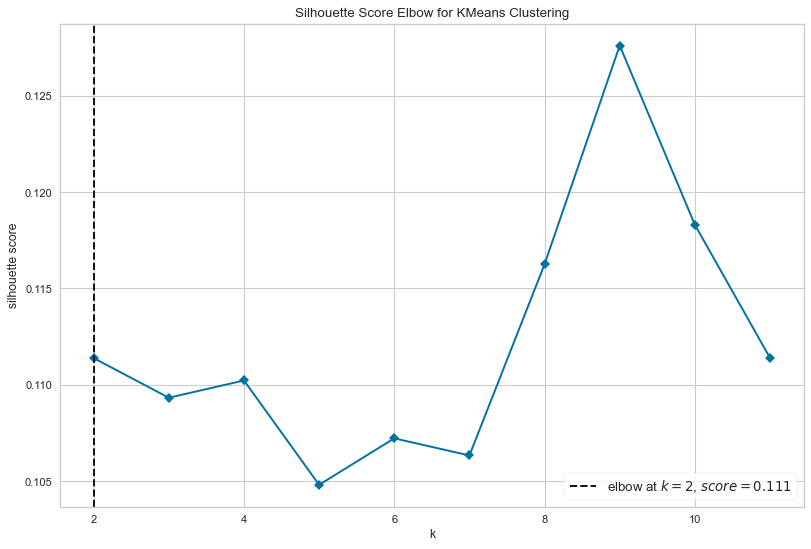

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [116]:
visualizer_sil = KElbowVisualizer(AgglomerativeClustering(linkage='ward'), k=(2,12), metric="silhouette", timings=False)
visualizer_sil.fit(encoder_df.copy())        # Fit the data to the visualizer
visualizer_sil.show()        # Finalize and render the figure

visualizer_silmeans = KElbowVisualizer(KMeans(), k=(2,12), metric="silhouette", timings=False)
visualizer_silmeans.fit(encoder_df.copy())        # Fit the data to the visualizer
visualizer_silmeans.show()        # Finalize and render the figure

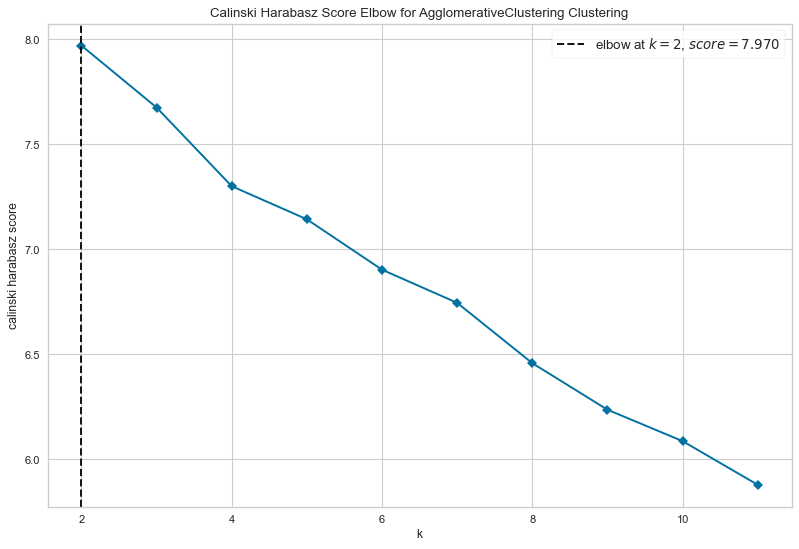

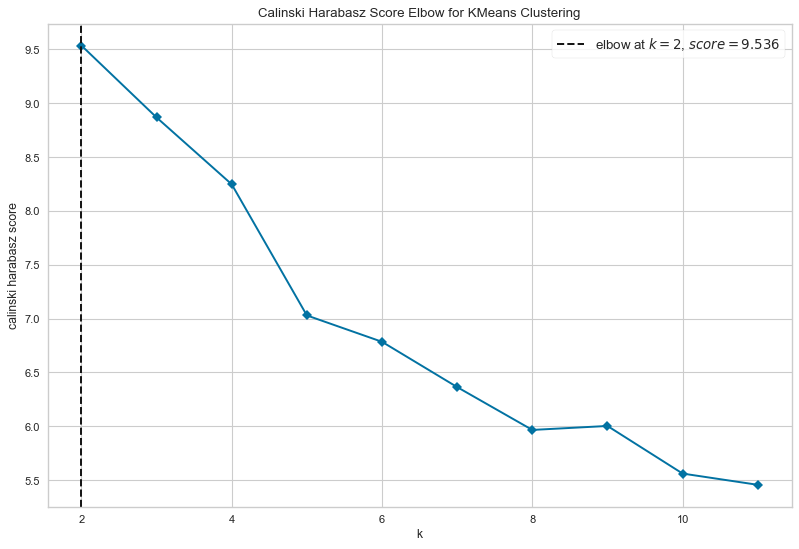

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [117]:
visualizer_cal = KElbowVisualizer(AgglomerativeClustering(linkage='ward'), k=(2,12), metric="calinski_harabasz", timings=False)
visualizer_cal.fit(encoder_df.copy())        # Fit the data to the visualizer
visualizer_cal.show()        # Finalize and render the figure

visualizer_cal_kmeans = KElbowVisualizer(KMeans(), k=(2,12), metric="calinski_harabasz", timings=False)
visualizer_cal_kmeans.fit(encoder_df.copy())        # Fit the data to the visualizer
visualizer_cal_kmeans.show()        # Finalize and render the figure

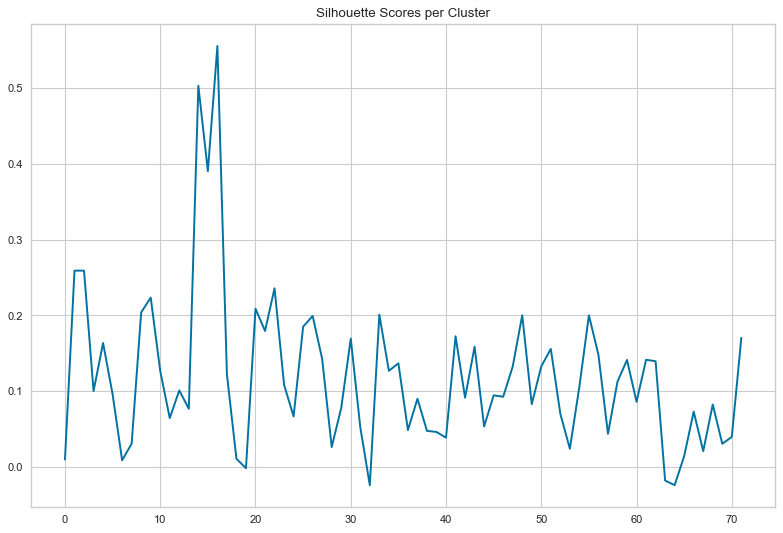

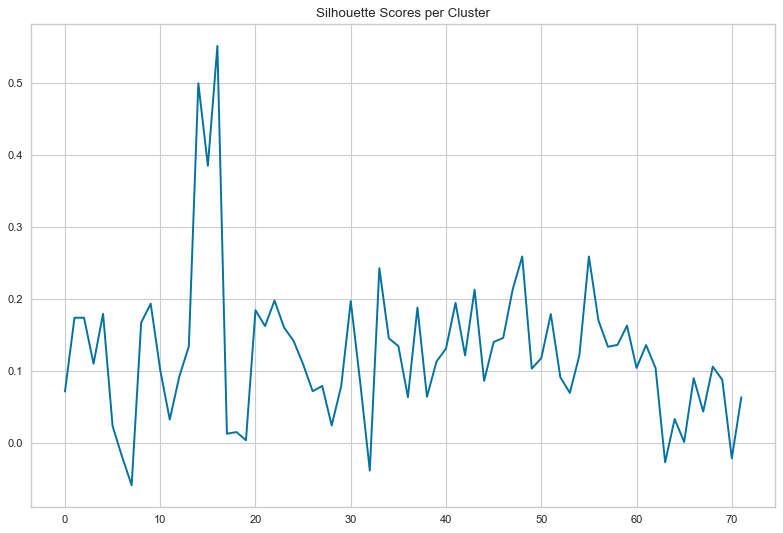

In [118]:
sil_score = silhouette_score(encoder_df.copy(), agglomerative_clustering.labels_, metric="euclidean")
sil_samples = silhouette_samples(encoder_df.copy(), agglomerative_clustering.labels_, metric="euclidean")

fig = plt.plot(sil_samples)
plt.title('Silhouette Scores per Cluster')
plt.show()

sil_score_kmeans = silhouette_score(encoder_df.copy(), cluster_kmeans, metric="euclidean")
sil_samples_kmeans = silhouette_samples(encoder_df.copy(), cluster_kmeans, metric="euclidean")

fig_kmeans = plt.plot(sil_samples_kmeans)
plt.title('Silhouette Scores per Cluster')
plt.show()

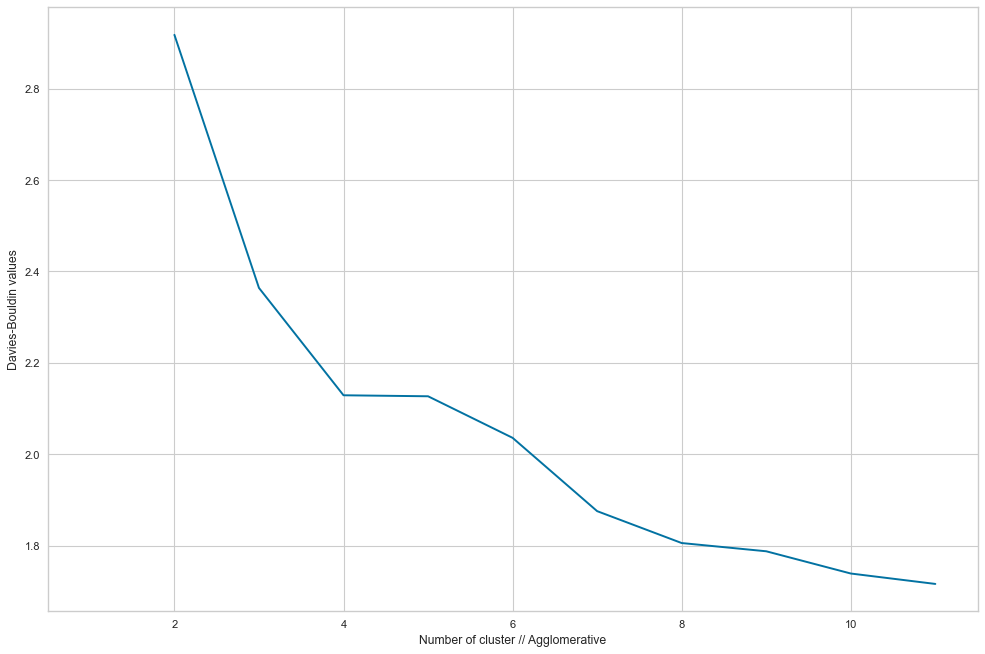

In [119]:
bvalues = []
clusters = range(2, 12)
for x in range (2, 12):
    rangecluster = AgglomerativeClustering(n_clusters=x, linkage='ward').fit_predict(encoder_df.copy())
    bvalues.append(davies_bouldin_score(encoder_df.copy(), rangecluster))

plt.figure(figsize=(15,10))
plt.plot(clusters, bvalues)
plt.xlabel("Number of cluster // Agglomerative")
plt.step(1, 2)
plt.ylabel("Davies-Bouldin values")
plt.show()

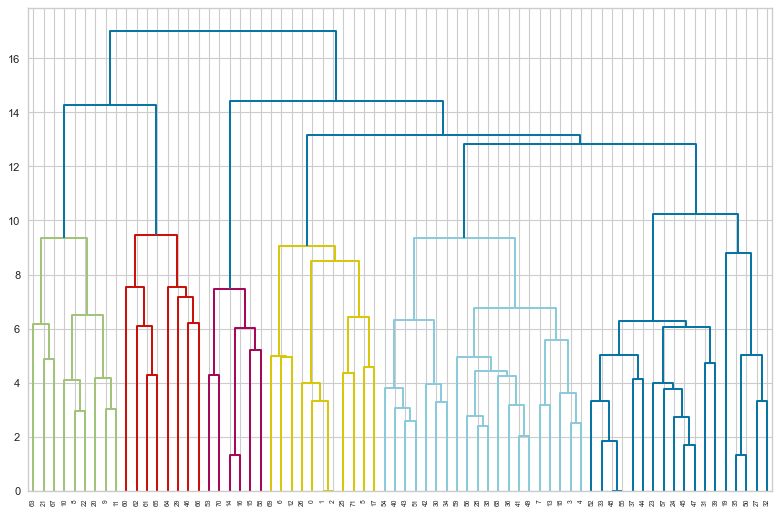

In [120]:
dend = shc.dendrogram(shc.linkage(scaled_data, method='ward', metric='euclidean'))

In [121]:
from sklearn.metrics.pairwise import euclidean_distances

def delta(c1, c2):
    values = np.ones([len(c1), len(c2)])*10000
    
    for i in range(0, len(c1)):
        for j in range(0, len(c2)):
            values[i, j] = np.linalg.norm(c1[i]-c2[j])
    return np.min(values)
    
def big_delta(ci):
    values = np.zeros([len(ci), len(ci)])
    for i in range(0, len(ci)):
        for j in range(0, len(ci)):
            values[i, j] = np.linalg.norm(ci[i]-ci[j])     
    return np.max(values)
    
def dunn(k_list):
    deltas = np.ones([len(k_list), len(k_list)])*1000000
    big_deltas = np.zeros([len(k_list), 1])
    l_range = list(range(0, len(k_list)))
    
    for k in l_range:
        for l in (l_range[0:k]+l_range[k+1:]):
            deltas[k, l] = delta(k_list[k], k_list[l])
        
        big_deltas[k] = big_delta(k_list[k])

    di = np.min(deltas)/np.max(big_deltas)
    return di

def delta_fast(ck, cl, distances):
    values = distances[np.where(ck)][:, np.where(cl)]
    values = values[np.nonzero(values)]
    return np.min(values)
    
def big_delta_fast(ci, distances):
    values = distances[np.where(ci)][:, np.where(ci)]      
    return np.max(values)

def dunn_fast(points, labels):
    distances = euclidean_distances(points)
    ks = np.sort(np.unique(labels))
    deltas = np.ones([len(ks), len(ks)])*1000000
    big_deltas = np.zeros([len(ks), 1])
    l_range = list(range(0, len(ks)))
    
    for k in l_range:
        for l in (l_range[0:k]+l_range[k+1:]):
            deltas[k, l] = delta_fast((labels == ks[k]), (labels == ks[l]), distances)
        
        big_deltas[k] = big_delta_fast((labels == ks[k]), distances)

    di = np.min(deltas)/np.max(big_deltas)
    return di
    
    
def big_s(x, center):
    len_x = len(x)
    total = 0     
    for i in range(len_x):
        total += np.linalg.norm(x[i]-center)    
    return total/len_x

def davisbouldin(k_list, k_centers):
    len_k_list = len(k_list)
    big_ss = np.zeros([len_k_list], dtype=np.float64)
    d_eucs = np.zeros([len_k_list, len_k_list], dtype=np.float64)
    db = 0    

    for k in range(len_k_list):
        big_ss[k] = big_s(k_list[k], k_centers[k])

    for k in range(len_k_list):
        for l in range(0, len_k_list):
            d_eucs[k, l] = np.linalg.norm(k_centers[k]-k_centers[l])

    for k in range(len_k_list):
        values = np.zeros([len_k_list-1], dtype=np.float64)
        for l in range(0, k):
            values[l] = (big_ss[k] + big_ss[l])/d_eucs[k, l]
        for l in range(k+1, len_k_list):
            values[l-1] = (big_ss[k] + big_ss[l])/d_eucs[k, l]

        db += np.max(values)
    res = db/len_k_list
    return res

In [132]:
prediction = X.copy()

prediction = pd.concat([X,pd.DataFrame(cluster_kmeans, columns=['pred'])], axis = 1)
prediction["pred"] = prediction.pred.astype('category')
prediction = prediction.dropna()

In [133]:
clus0 = prediction.loc[prediction.pred == 0]
clus1 = prediction.loc[prediction.pred == 1]
clus2 = prediction.loc[prediction.pred == 2]
clus3 = prediction.loc[prediction.pred == 3]  
clus4 = prediction.loc[prediction.pred == 4]  
k_list = [clus0.values, clus1.values,clus2.values,clus3.values,clus4.values]

In [134]:
dunn(k_list)

0.3187042369409263

In [125]:
prediction = X.copy()

prediction = pd.concat([X,pd.DataFrame(agglomerative_clustering.labels_, columns=['pred'])], axis = 1)
prediction["pred"] = prediction.pred.astype('category')
prediction = prediction.dropna()

In [126]:
clus0 = prediction.loc[prediction.pred == 0]
clus1 = prediction.loc[prediction.pred == 1]
clus2 = prediction.loc[prediction.pred == 2]
clus3 = prediction.loc[prediction.pred == 3]  
clus4 = prediction.loc[prediction.pred == 4]  
k_list = [clus0.values, clus1.values,clus2.values,clus3.values,clus4.values]

In [127]:
dunn(k_list)

0.3494681278325547

In [128]:
# group clusters for agglomerative clustering
cluster_df = [0] * cluster_size
for i in range (cluster_size):
    cluster_df[i] = pd.DataFrame(columns=df.columns)

for id, value in enumerate(agglomerative_clustering.labels_):
    cluster_df[value] = pd.concat([cluster_df[value], df.iloc[[id]]])

c_array = []
for x in range (cluster_size):
    c_array.append(cluster_df[x].mode())

final_df = pd.concat(c_array)
final_df = final_df.dropna()

cluster_measures = []
for x in range (cluster_size):
    cluster_measures.append(f'Cluster {x}: {int(np.floor(len(cluster_df[x])/len(df)*100))}%')

final_df.index=(tuple(cluster_measures))
final_df = final_df.transpose()
print('Agglomerative Distribution')
final_df


Agglomerative Distribution


,Cluster 0: 31%,Cluster 1: 36%,Cluster 2: 15%,Cluster 3: 4%,Cluster 4: 12%
1,,,,,
Access,Open,Open,Token Ownership,Invitation,Open
Type,Profit from Tokens,Profit from Tokens,Community,Decider,Profit from Tokens
Is hierachical,No,No,No,No,No
Anonymity,Pseudonymous,Pseudonymous,Pseudonymous,Known,Pseudonymous
Contributor Rewards,Governance Token,Governance Token,Other Token,Governance Token,Governance Token
Purpose,Product Building and Management,Product Building and Management,Community Building and Engagement,Investing or Fund Raising,Product Building and Management
Token Type,Singular,Singular,Singular,Singular,Singular
Supply Cap,Capped,Capped,Capped,Capped,Capped
Entry Barriers,Ownership,Ownership,Ownership,Invitation,Ownership


In [129]:
# group clusters for kmeans clustering
cluster_df = [0] * cluster_size
for i in range (cluster_size):
    cluster_df[i] = pd.DataFrame(columns=df.columns)

for id, value in enumerate(cluster_kmeans):
    cluster_df[value] = pd.concat([cluster_df[value], df.iloc[[id]]])

c_array = []
for x in range (cluster_size):
    c_array.append(cluster_df[x].mode())

kmeans_df = pd.concat(c_array)
kmeans_df = kmeans_df.drop([1])

cluster_measures = []
for x in range (cluster_size):
    cluster_measures.append(f'Cluster {x}: {int(np.floor(len(cluster_df[x])/len(df)*100))}%')

kmeans_df.index=(tuple(cluster_measures))
kmeans_df = kmeans_df.transpose()
print('KMeans Distribution')
kmeans_df

KMeans Distribution


,Cluster 0: 18%,Cluster 1: 16%,Cluster 2: 31%,Cluster 3: 4%,Cluster 4: 29%
1,,,,,
Access,Open,Token Ownership,Open,Invitation,Open
Type,Profit from Tokens,Community,Profit from Tokens,Decider,Profit from Tokens
Is hierachical,No,No,No,No,No
Anonymity,Anonymous,Pseudonymous,Pseudonymous,Known,Pseudonymous
Contributor Rewards,Governance Token,Other Token,Governance Token,Governance Token,Governance Token
Purpose,Product Building and Management,Community Building and Engagement,Product Building and Management,Investing or Fund Raising,Product Building and Management
Token Type,Singular,Singular,Singular,Singular,Singular
Supply Cap,Capped,Capped,Capped,Capped,Capped
Entry Barriers,Ownership,Ownership,Ownership,Invitation,Ownership


In [130]:
df['PCA'] = cluster_kmeans
df['DBSCAN'] = dbscan.labels_
df['GMM'] = cluster_gmm
df['Agglomerative'] = agglomerative_clustering.labels_
df['DAO'] = original_df['Unnamed: 1']
df

1,Access,Type,Is hierachical,Anonymity,Contributor Rewards,Purpose,Token Type,Supply Cap,Entry Barriers,is fully Public,...,Diversification,Stakes Tokens,Capital Gain,Initial Airdrop,Initial Token Sale,PCA,DBSCAN,GMM,Agglomerative,DAO
2,Open,Profit from Tokens,No,Anonymous,Governance Token,Product Building and Management,Singular,Capped,Ownership,Yes,...,None,Yes,Services,Yes,No,4,0,4,0,Uniswap
3,Open,Profit from Tokens,No,Anonymous,Governance Token,Product Building and Management,Singular,Capped,Ownership,Yes,...,None,Yes,Services,No,Yes,0,1,0,4,Compound
4,Open,Profit from Tokens,No,Anonymous,Governance Token,Product Building and Management,Singular,Capped,Ownership,Yes,...,None,Yes,Services,No,Yes,0,1,0,4,Aave
5,Open,Profit from Tokens,No,Anonymous,Governance Token,Product Building and Management,Singular,Capped,Ownership,Yes,...,Very,Yes,Services,Yes,No,4,0,1,0,Badger
6,Open,Profit from Tokens,No,Anonymous,Governance Token,Product Building and Management,Singular,Capped,Ownership,Yes,...,None,Yes,Services,Yes,No,4,0,1,0,SushiChef
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,Token Ownership,Community,No,Pseudonymous,Other Token,Community Building and Engagement,Singular,Capped,Ownership,Yes,...,Very,Yes,Services,No,Yes,2,-1,3,1,Developer DAO
70,Invitation,Decider,No,Pseudonymous,Governance Token,Product Building and Management,Singular,Capped,Ownership,Yes,...,Very,No,Services,Yes,No,4,0,1,0,KeeperDAO
71,Token Ownership,Community,No,Anonymous,Other Token,Community Building and Engagement,Singular,Uncapped,Ownership,Yes,...,Very,No,Token Sales,No,Yes,1,-1,3,2,Nouns DAO
72,Open,Profit from Tokens,No,Anonymous,Other Token,Product Building and Management,Primary and Reputation,Capped,Ownership,No,...,Very,No,Services,No,Yes,0,2,0,4,Popcorn


In [131]:
df.to_excel('cluster_output_new.xlsx', sheet_name='Clusters')